In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder 
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_row', 147)
pd.set_option('display.max_column', 147)

In [4]:
df = pd.read_csv("segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
df.shape

(2000, 8)

In [6]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


## Here is how to view the top and bottom rows of the frame

In [63]:
df.tail(3) # the three lasst rows

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster_Id
1997,100001998,0,0,31,0,86400,0,0,1
1998,100001999,1,1,24,1,97968,0,0,1
1999,100002000,0,0,25,0,68416,0,0,1


## Selecting on a multi-axis by label:

In [64]:
df.loc[:, ["Age", "Income"]]

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
...,...,...
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968


## Select via the position of the passed integers:

In [65]:
df.iloc[10]

ID                 100000011
Sex                        1
Marital status             1
Age                       25
Education                  1
Income                108469
Occupation                 1
Settlement size            0
Cluster_Id                 1
Name: 10, dtype: int64

In [66]:
df.iloc[1:3, :]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster_Id
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,0


In [68]:
df.iloc[:, 1:3].head()

,Sex,Marital status
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [8]:
df.dtypes.value_counts()

int64    8
dtype: int64

In [9]:
df["Age"].value_counts()

26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
29     70
30     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
41     33
43     33
45     31
44     30
49     29
48     29
47     26
50     23
20     23
57     20
52     19
51     19
54     17
53     16
63     15
64     14
60     13
61     13
58     12
65     12
56     10
55     10
67     10
66      9
62      8
68      7
71      5
19      5
59      5
74      4
18      3
70      3
73      3
75      2
72      1
76      1
Name: Age, dtype: int64

In [10]:
df[df["Age"] == 26]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
24,100000025,0,1,26,1,103667,1,2
41,100000042,0,1,26,1,130921,1,0
55,100000056,0,0,26,0,58258,0,0
64,100000065,1,1,26,1,118372,1,1
104,100000105,0,1,26,1,107276,1,1
171,100000172,1,1,26,1,95159,1,1
174,100000175,0,0,26,0,113515,1,1
202,100000203,0,0,26,0,129864,1,1
207,100000208,0,0,26,0,103411,1,2
220,100000221,0,1,26,1,68804,0,0


In [11]:
df_0 = df[df["Sex"] == 0]

In [12]:
df_0["Income"].value_counts().sum()

1086

In [13]:
df.corr() #Very low Correlation

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


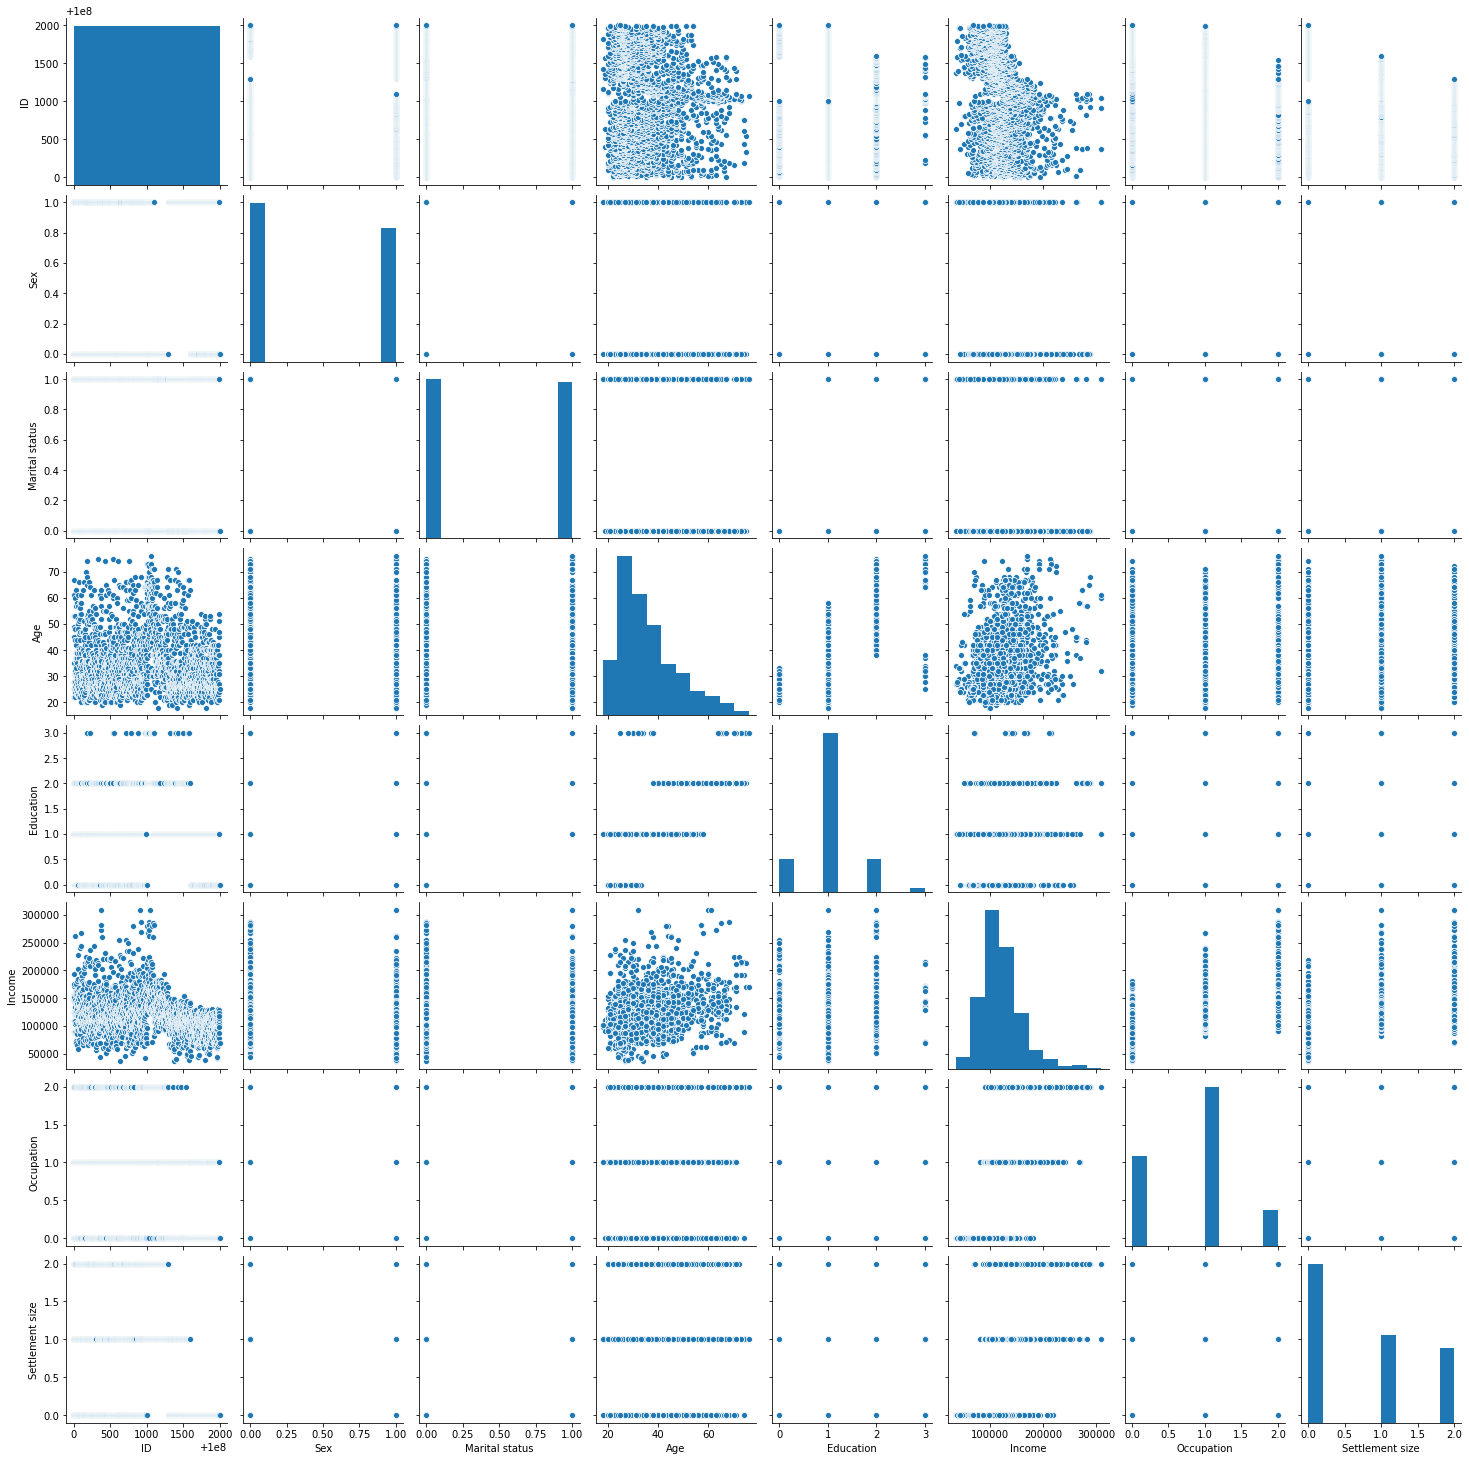

In [14]:
sns.pairplot(df)

C:\ANACONDA\Boris_Tondjua\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Settlement size


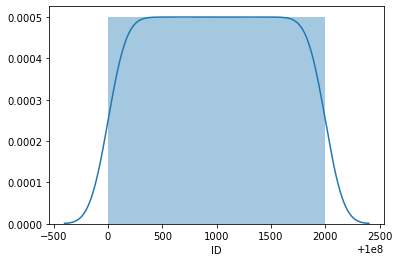

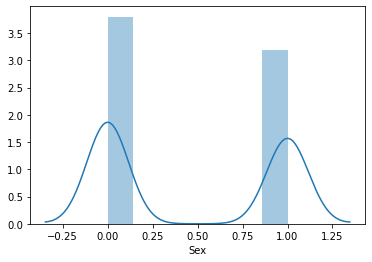

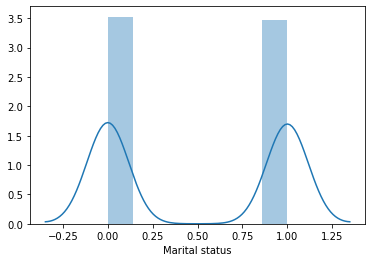

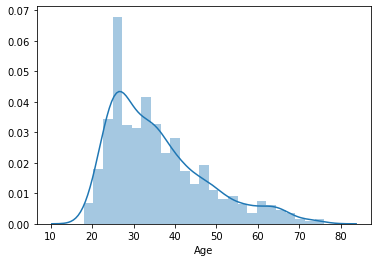

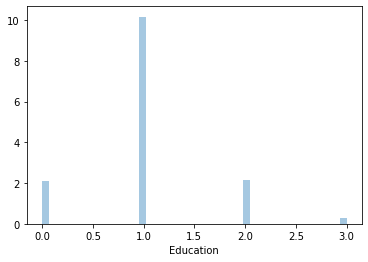

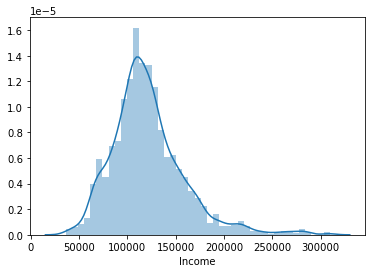

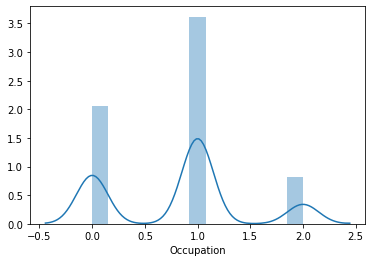

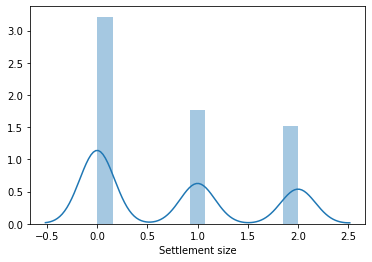

In [15]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])
print(col)

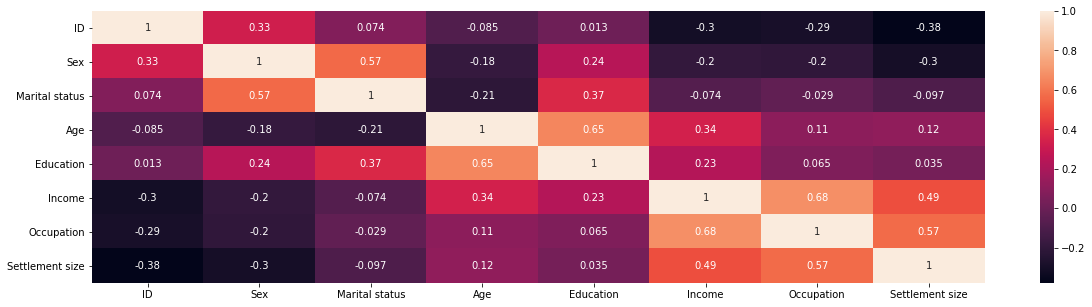

In [16]:
plt.figure(figsize=(20 , 5))
sns.heatmap(df.corr() , annot= True)

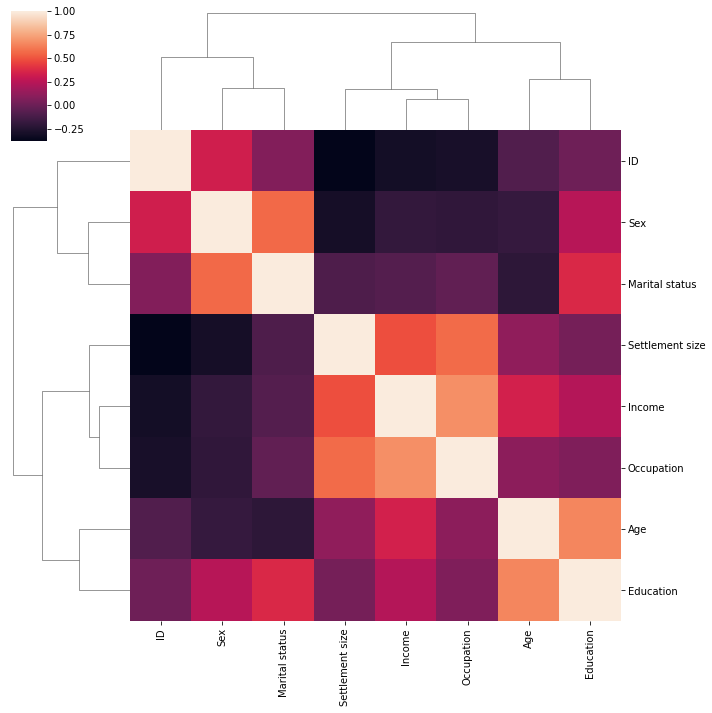

In [17]:
sns.clustermap(df.corr())

In [18]:
X_standar = StandardScaler()

In [19]:
X_transform = X_standar.fit_transform(df)

In [20]:
X_transform.shape

(2000, 8)

In [21]:
type(X_transform)

numpy.ndarray

### Outliers detection

In [22]:
from sklearn.ensemble import IsolationForest

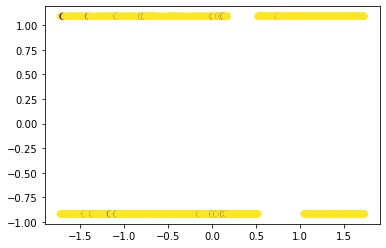

In [23]:
model = IsolationForest(contamination=0.01)
model.fit(X_transform)

plt.scatter(X_transform[:,0], X_transform[:, 1], c = model.predict(X_transform))

## AgglomerativeClustering

In [24]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

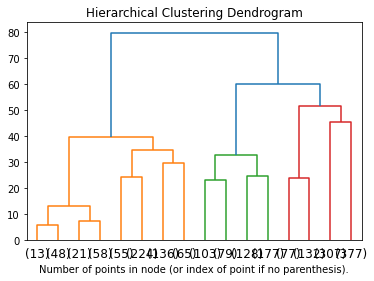

In [25]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_transform)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


## silhouette_curve

For n_clusters = 5 The average silhouette_score is : 0.22623488010131207
For n_clusters = 6 The average silhouette_score is : 0.23424459194188876
For n_clusters = 7 The average silhouette_score is : 0.23183987777692822
For n_clusters = 8 The average silhouette_score is : 0.24081692135049326
For n_clusters = 9 The average silhouette_score is : 0.22870150277268209
For n_clusters = 10 The average silhouette_score is : 0.2541456786633258
For n_clusters = 11 The average silhouette_score is : 0.26204062449707366
For n_clusters = 12 The average silhouette_score is : 0.2578442688394221
For n_clusters = 13 The average silhouette_score is : 0.27303384949901266
For n_clusters = 14 The average silhouette_score is : 0.27895057584592314
For n_clusters = 15 The average silhouette_score is : 0.27539341515057725
For n_clusters = 16 The average silhouette_score is : 0.27333727674960095
For n_clusters = 17 The average silhouette_score is : 0.2764883219994158
For n_clusters = 18 The average silhouette_sco

<ipython-input-26-82d62ec0f0c8>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 25 The average silhouette_score is : 0.29182472410570653


<ipython-input-26-82d62ec0f0c8>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 26 The average silhouette_score is : 0.29969778196525326


<ipython-input-26-82d62ec0f0c8>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 27 The average silhouette_score is : 0.30472879285960114


<ipython-input-26-82d62ec0f0c8>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 28 The average silhouette_score is : 0.3114655924871965


<ipython-input-26-82d62ec0f0c8>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 29 The average silhouette_score is : 0.2960769584778309


<ipython-input-26-82d62ec0f0c8>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 30 The average silhouette_score is : 0.3053743939951937


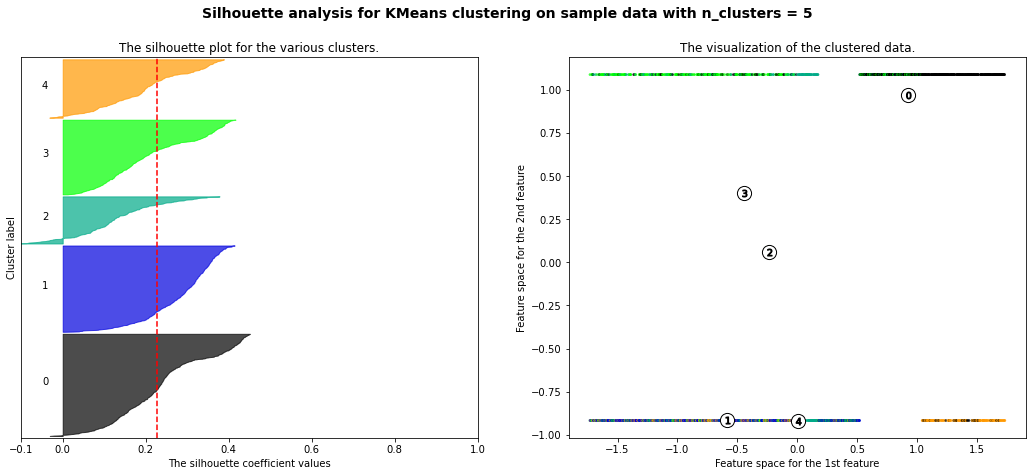

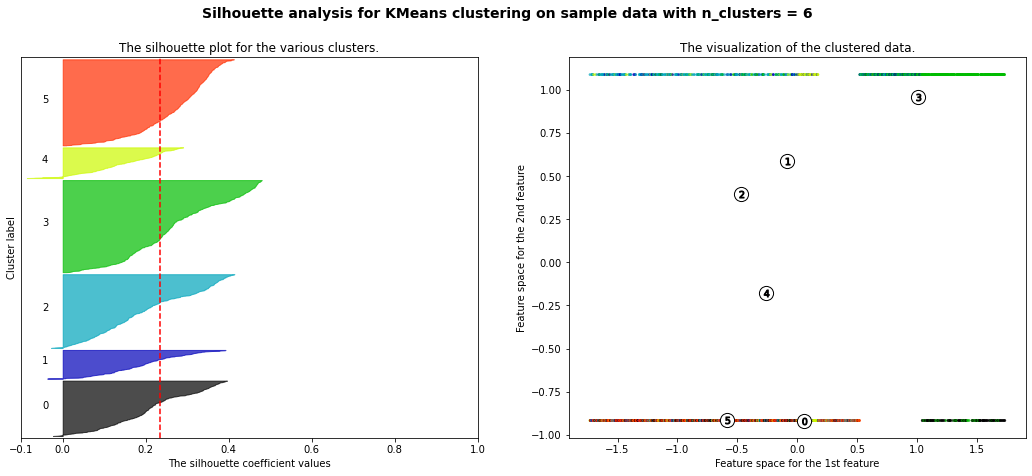

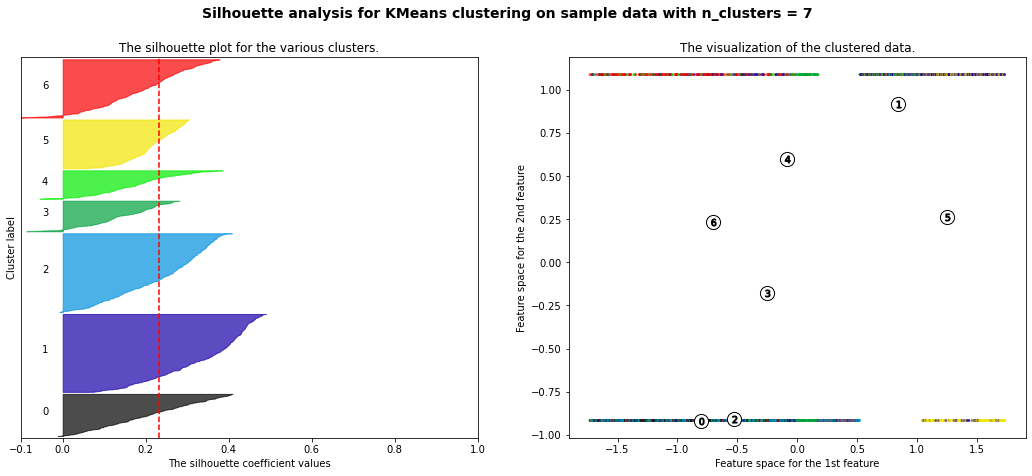

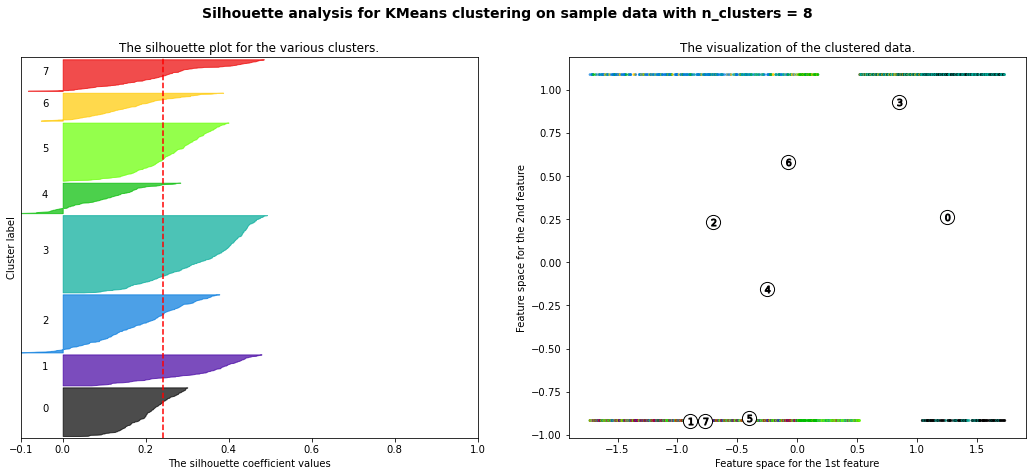

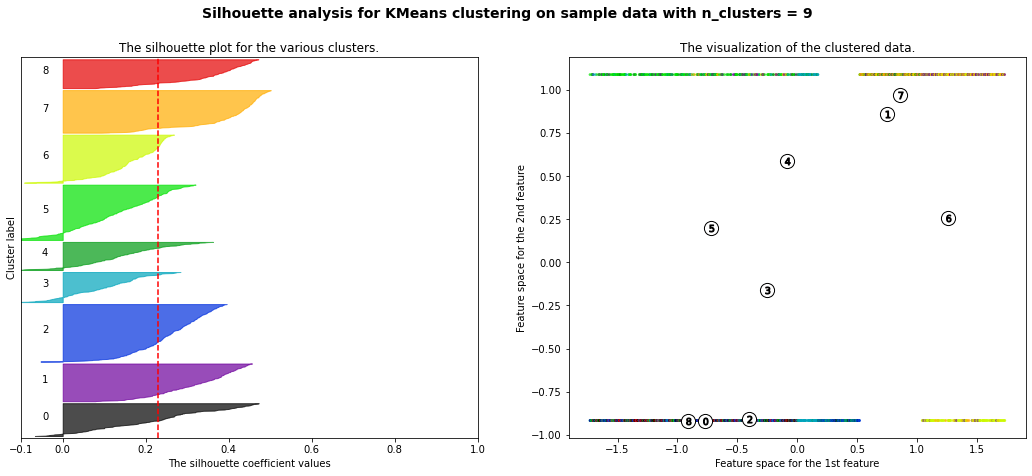

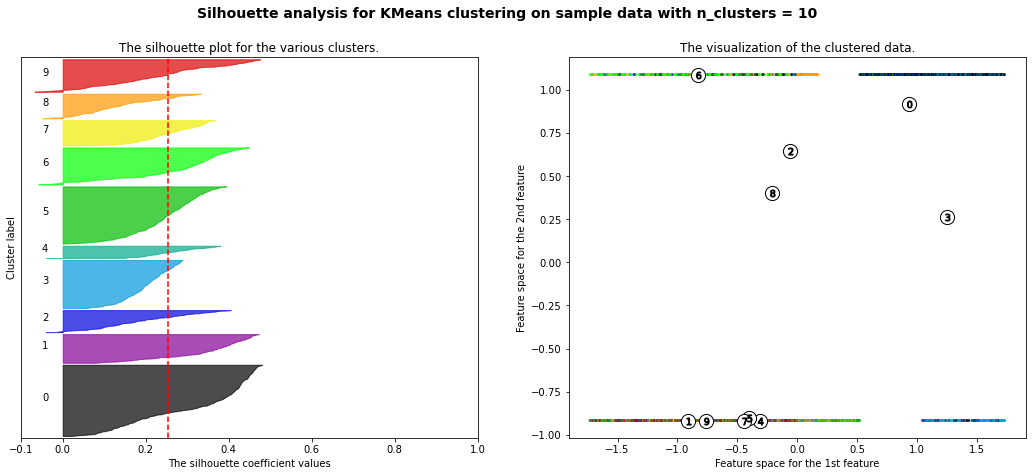

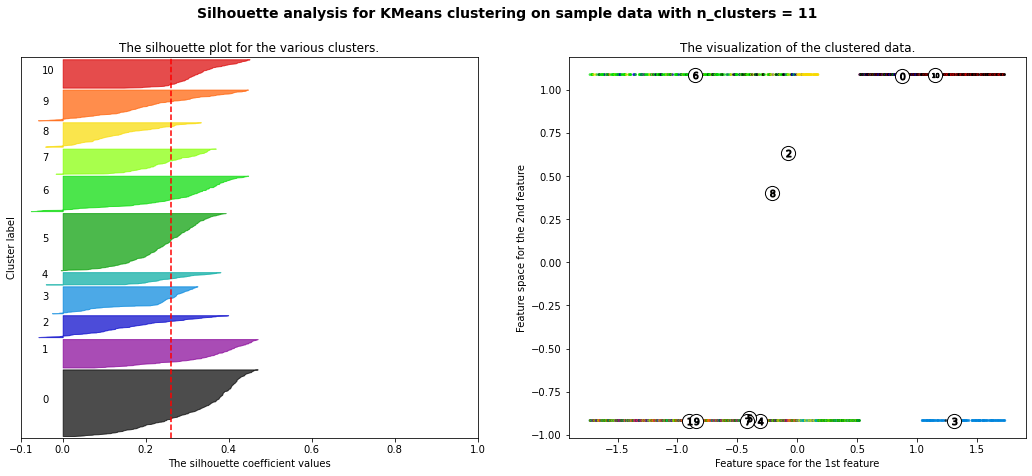

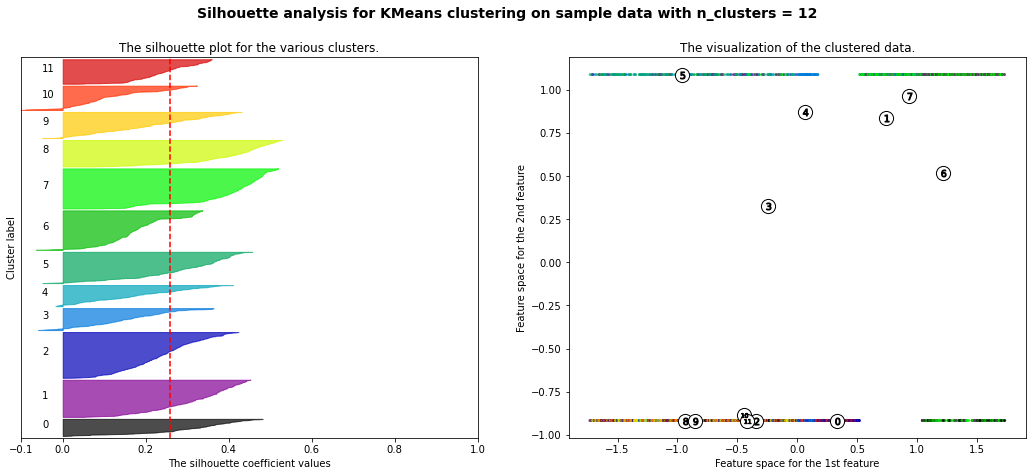

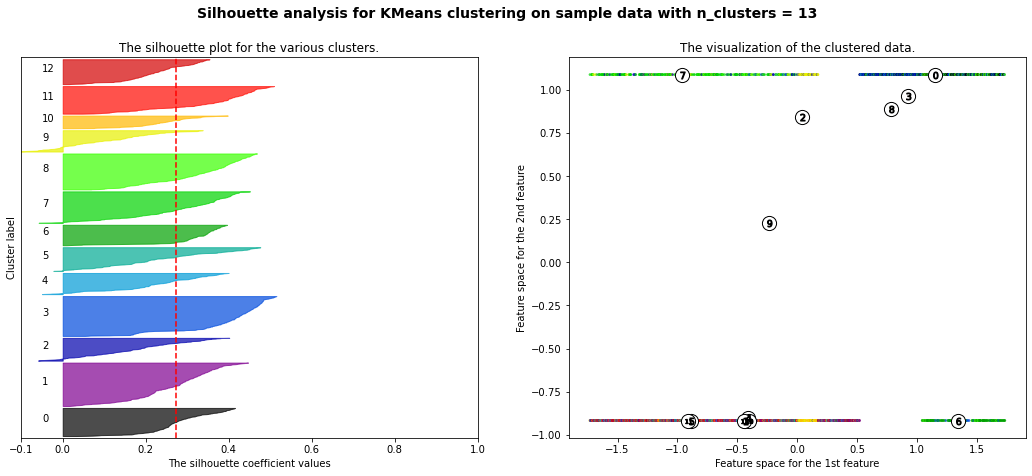

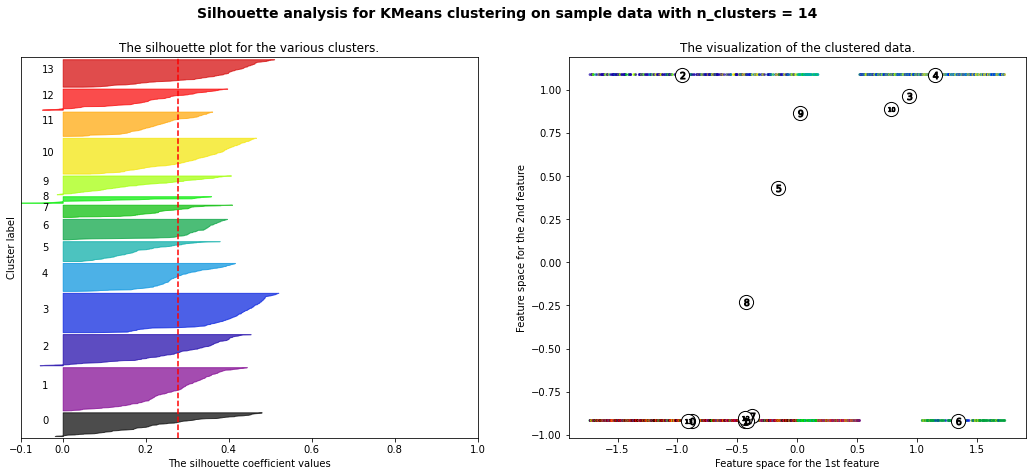

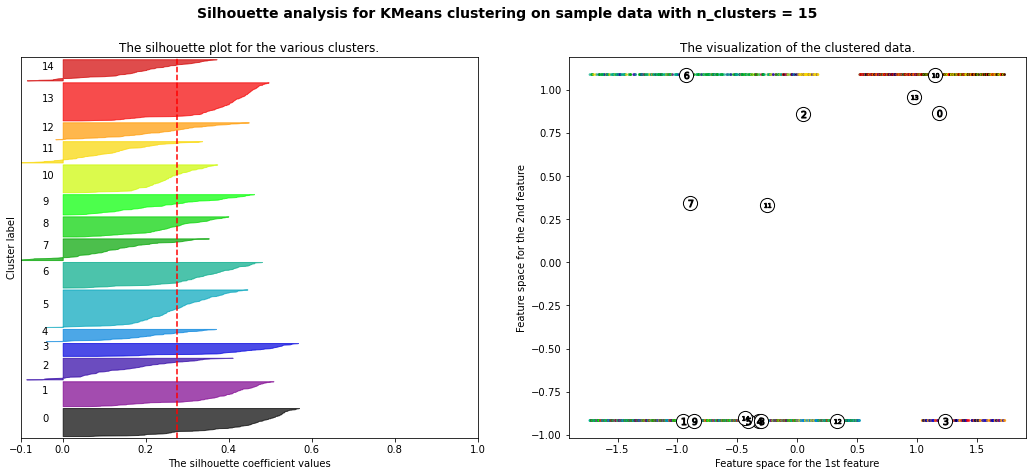

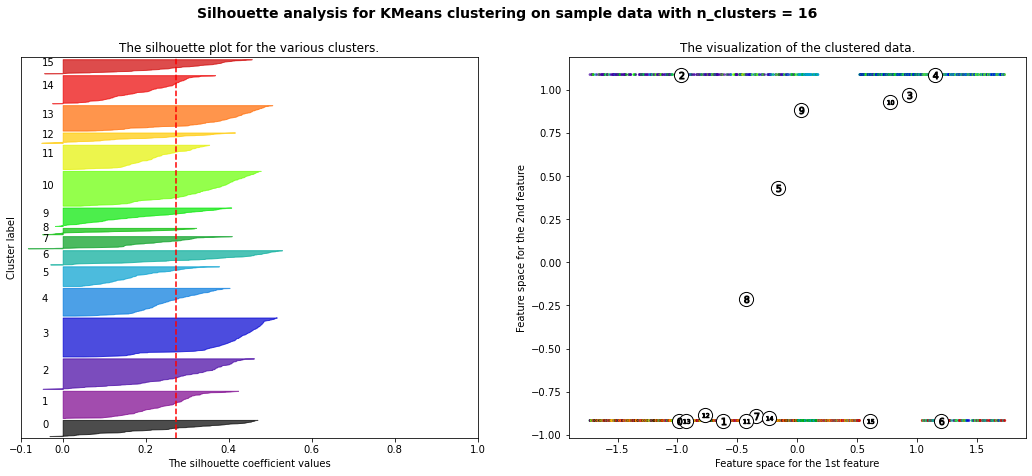

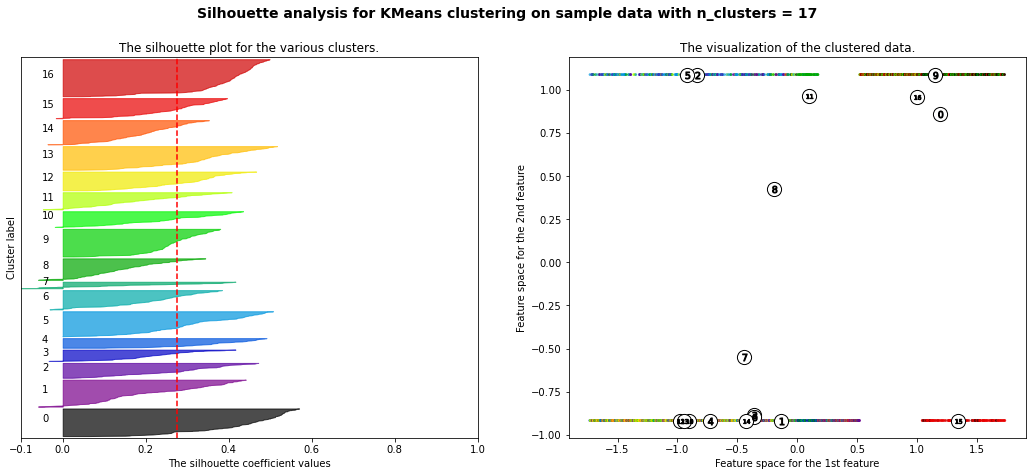

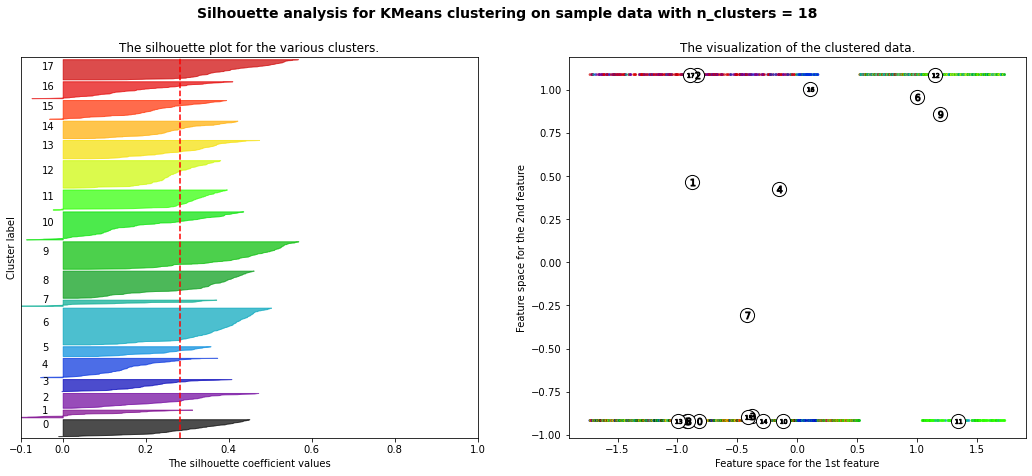

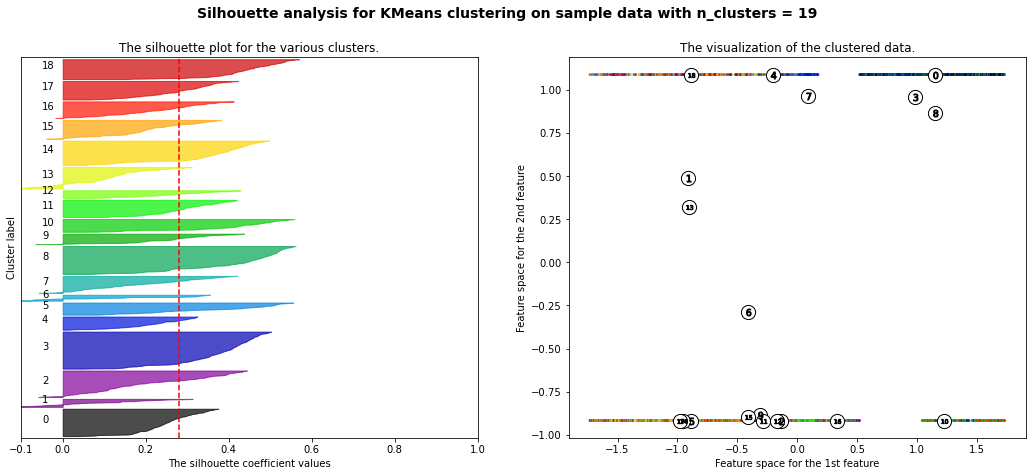

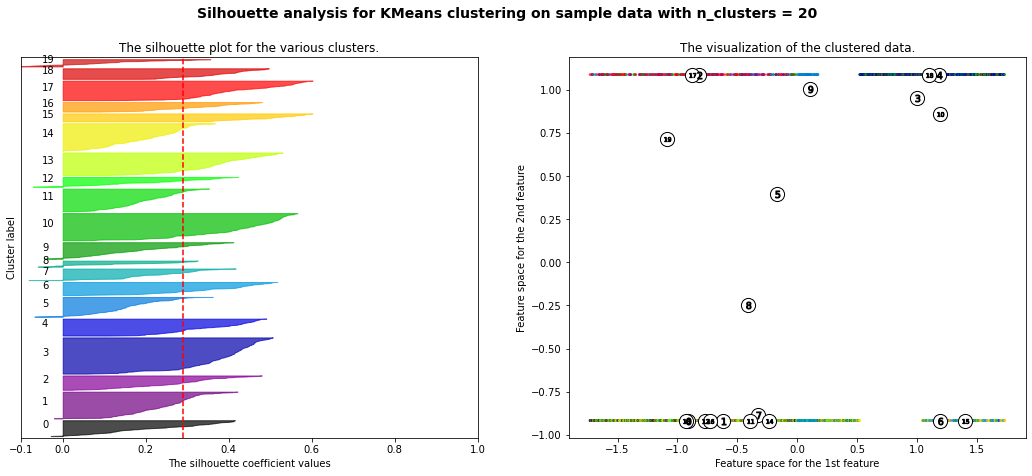

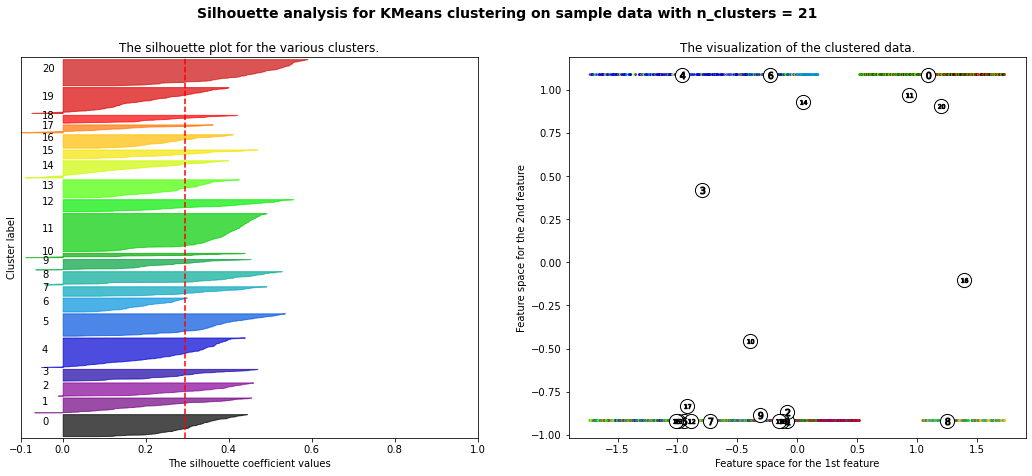

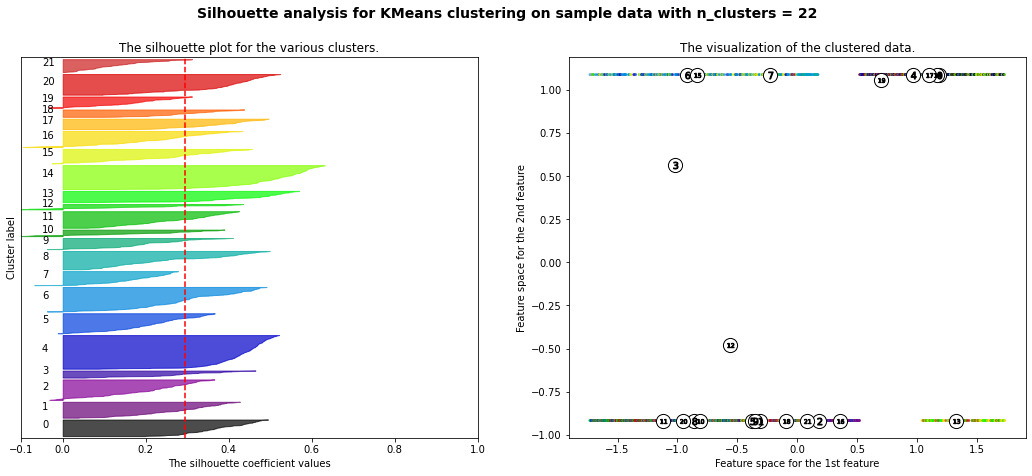

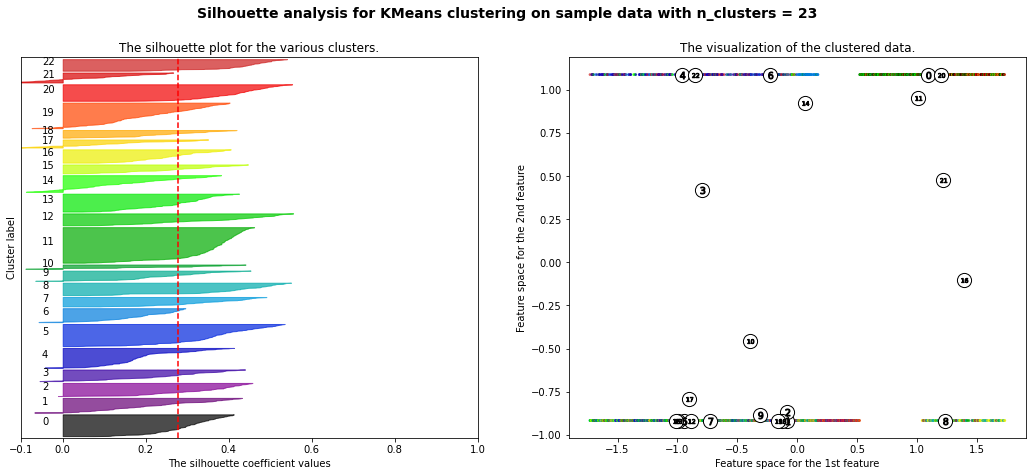

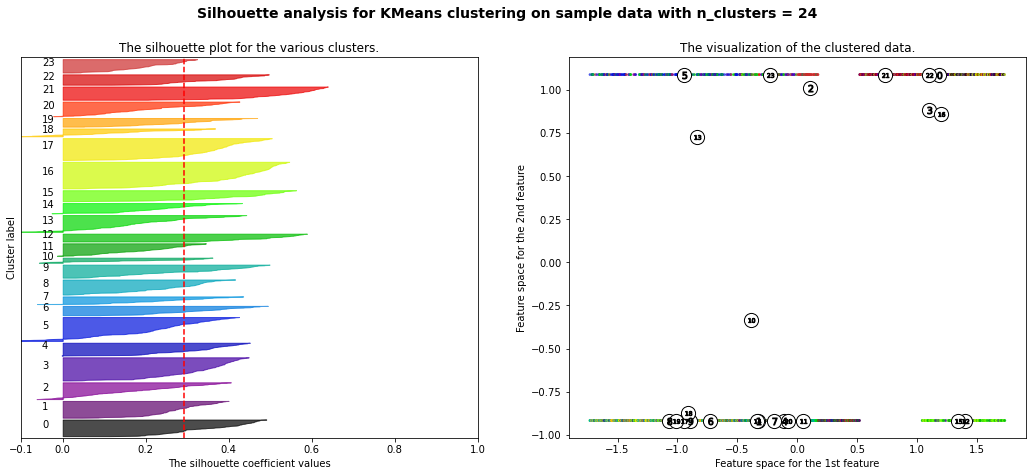

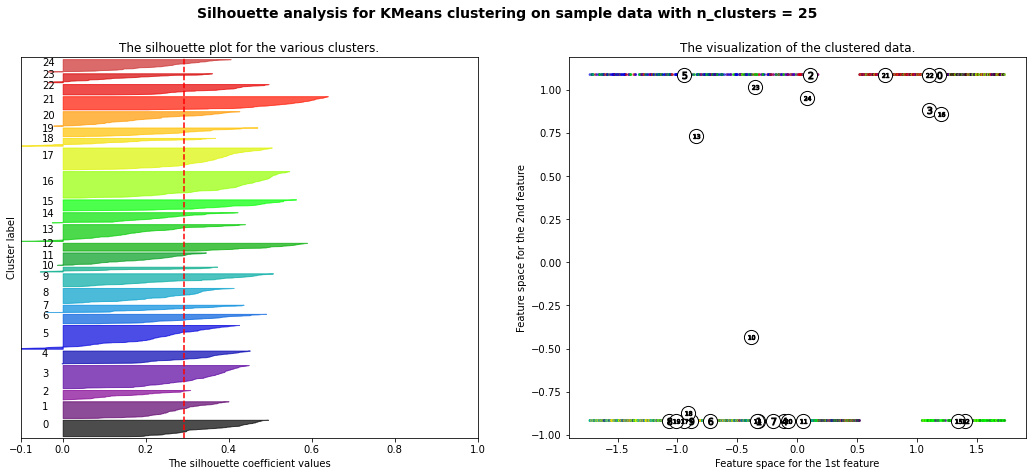

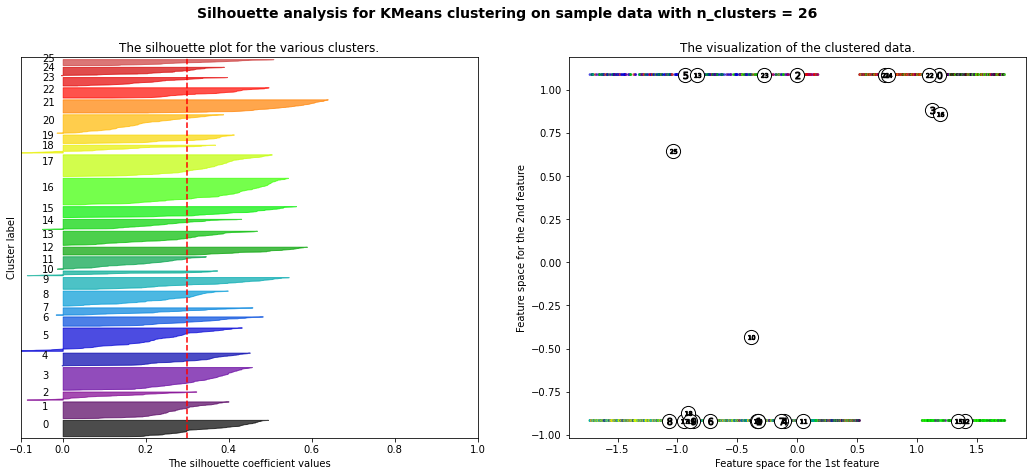

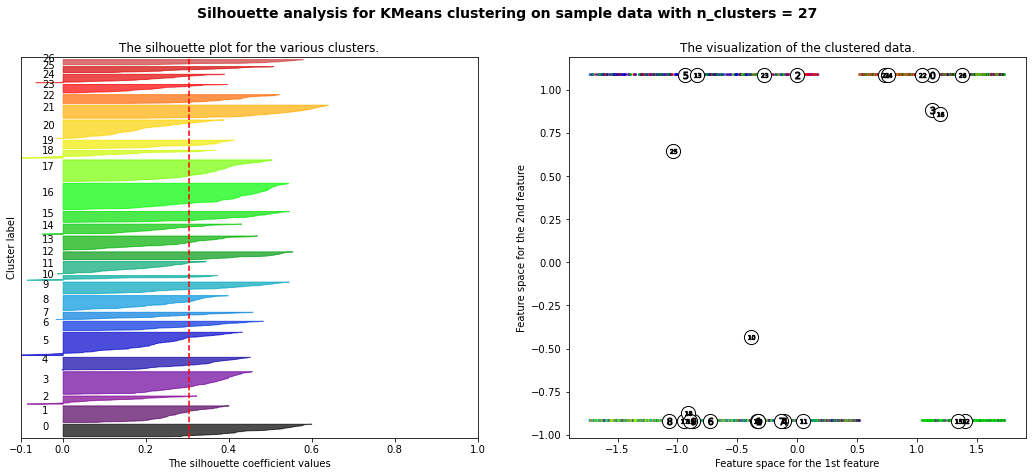

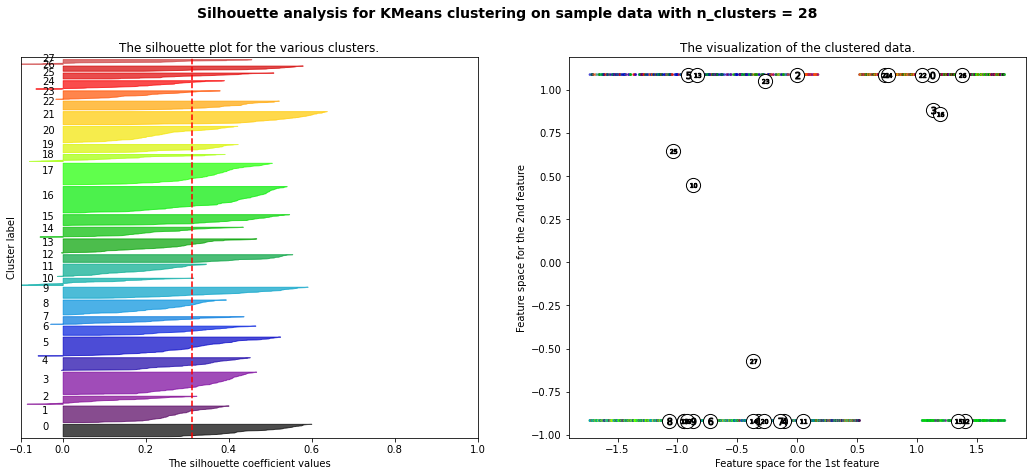

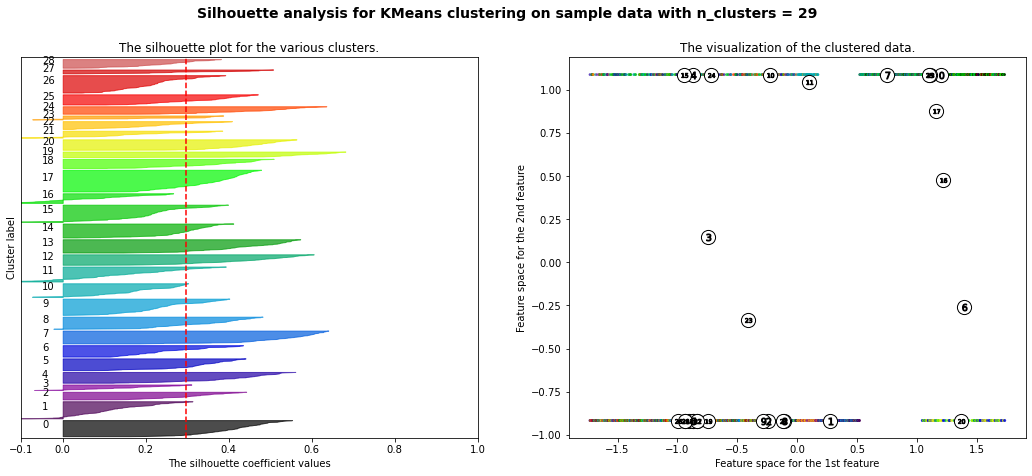

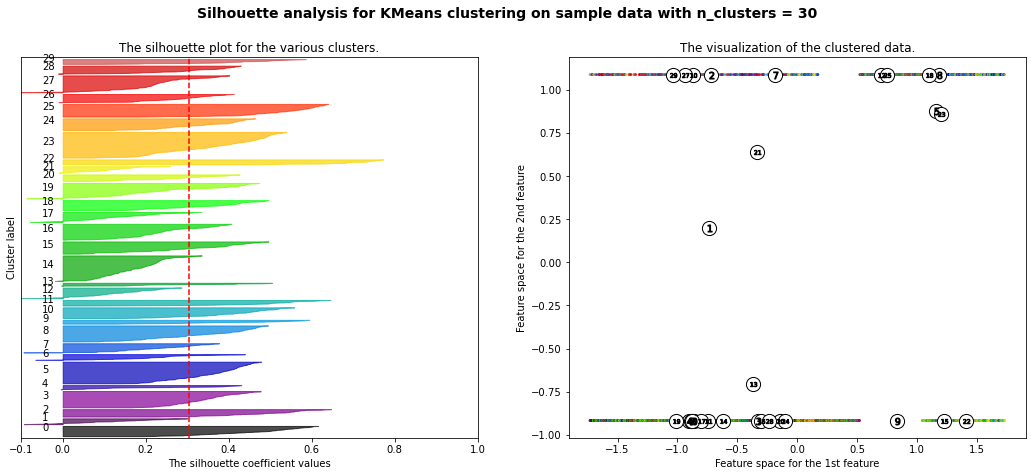

In [26]:
# Fuktion aus Sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = range(5, 31)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_transform) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_transform, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_transform, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_transform[:, 0], X_transform[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## TSNE

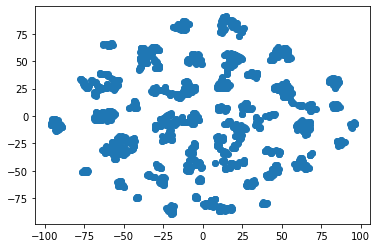

In [27]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2 , perplexity = 10).fit_transform(X_transform)
plt.scatter(X_embedded[:,0], X_embedded[:,1] )

## Elbow Method

Text(0.5, 0, 'nomber of clusters')

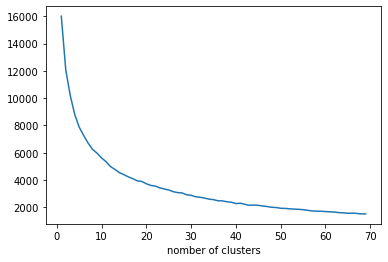

In [28]:
inertia = []
K_range = range(1, 70)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X_transform)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nomber of clusters')

## K-Means-Clustering

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 3)
model.fit(X_transform)

KMeans(n_clusters=3)

-10195.850013595253

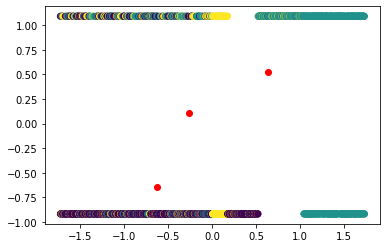

In [30]:
model = KMeans(n_clusters=3)
model.fit(X_transform)
model.predict(X_transform)
plt.scatter(X_transform[:,0], X_transform[:,1], c=model.predict(X_transform))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X_transform)

In [31]:
model.labels_

array([2, 0, 0, ..., 1, 1, 1])

In [32]:
model.cluster_centers_

array([[-0.63221932, -0.63964022, -0.39929909, -0.12278096, -0.43886611,
         0.41866007,  0.56280672,  0.71770467],
       [ 0.63100548,  0.52243336,  0.22316267, -0.41823736, -0.1908164 ,
        -0.61824495, -0.59066041, -0.724269  ],
       [-0.26085348,  0.10368518,  0.39109263,  1.66337816,  1.81206357,
         0.80788103,  0.32392248,  0.32129825]])

In [33]:
model.n_clusters

3

In [34]:
model.n_features_in_

8

In [35]:
model.score

<bound method KMeans.score of KMeans(n_clusters=3)>

In [36]:
df["Cluster_Id"] = model.labels_
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster_Id
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0


In [57]:
df_Cluster_0 = df[df["Cluster_Id"] == 0]
df_Cluster_0.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster_Id
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0
5,100000006,0,0,35,1,144848,0,0,0
6,100000007,0,0,53,1,156495,1,1,0
7,100000008,0,0,35,1,193621,2,1,0
9,100000010,0,1,28,1,174646,2,0,0
12,100000013,1,1,22,1,108687,1,2,0
14,100000015,1,1,28,1,102899,1,1,0


In [58]:
df_Cluster_0.shape

(794, 9)

In [59]:
df_Cluster_1 = df[df["Cluster_Id"] == 1]
df_Cluster_1.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster_Id
10,100000011,1,1,25,1,108469,1,0,1
11,100000012,1,1,24,1,127596,1,0,1
15,100000016,1,1,32,1,88428,0,0,1
25,100000026,0,0,36,1,71909,0,0,1
26,100000027,0,1,39,1,68264,0,0,1
47,100000048,1,1,23,1,65421,0,0,1
49,100000050,1,1,28,1,122831,1,0,1
55,100000056,0,0,26,0,58258,0,0,1
59,100000060,1,1,23,1,115240,0,0,1
66,100000067,1,1,29,1,111069,1,0,1


In [60]:
df_Cluster_1.shape

(917, 9)

In [61]:
df_Cluster_2 = df[df["Cluster_Id"] == 2]
df_Cluster_2.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster_Id
0,100000001,0,0,67,2,124670,1,2,2
8,100000009,0,1,61,2,151591,0,0,2
13,100000014,0,0,60,2,89374,0,0,2
18,100000019,1,1,44,2,261952,2,2,2
27,100000028,1,1,42,2,163025,1,1,2
29,100000030,0,0,63,2,175882,1,0,2
33,100000034,0,0,57,2,87605,0,0,2
44,100000045,1,1,58,2,142335,0,1,2
54,100000055,0,0,57,2,135830,1,1,2
62,100000063,0,0,61,2,166410,2,1,2


In [62]:
df_Cluster_2.shape

(289, 9)

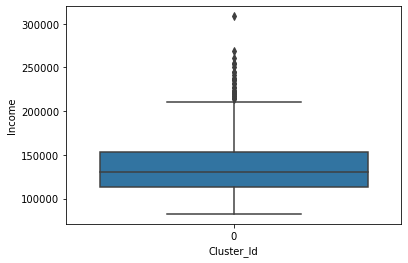

In [50]:
sns.boxplot(x='Cluster_Id', y='Income', data = df_Cluster_0)